In [16]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import load_img
from matplotlib import pyplot as plt



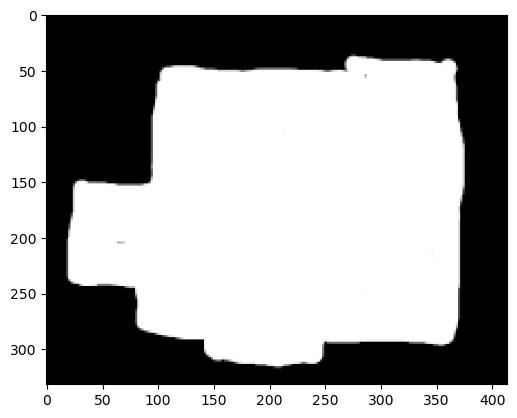

In [52]:
img = load_img('data/train/annotations/task-1-annotation-1-by-1-tag-House-0.png',target_size=(332,414)) # target_size=(166,207))


plt.imshow(img)

In [25]:
class InputStream:
    def __init__(self, data):
        self.data = data
        self.i = 0

    def read(self, size):
        out = self.data[self.i:self.i + size]
        self.i += size
        return int(out, 2)

In [26]:
def access_bit(data, num):
    """ from bytes array to bits by num position
    """
    base = int(num // 8)
    shift = 7 - int(num % 8)
    return (data[base] & (1 << shift)) >> shift

def bytes2bit(data):
    """ get bit string from bytes data
    """
    return ''.join([str(access_bit(data, i)) for i in range(len(data) * 8)])

In [84]:
def decode_rle(rle, original_height, original_width, print_params: bool = False):
    """ from LS RLE to numpy uint8 3d image [width, height, channel]
    
    Args:
        print_params (bool, optional): If true, a RLE parameters print statement is suppressed
    """
    input = InputStream(bytes2bit(rle))
    num = input.read(32)
    word_size = input.read(5) + 1
    rle_sizes = [input.read(4) + 1 for _ in range(4)]
    
    if print_params:
        print('RLE params:', num, 'values', word_size, 'word_size', rle_sizes, 'rle_sizes')
        
    i = 0
    out = np.zeros(num, dtype=np.uint8)
    while i < num:
        x = input.read(1)
        j = i + 1 + input.read(rle_sizes[input.read(2)])
        if x:
            val = input.read(word_size)
            out[i:j] = val
            i = j
        else:
            while i < j:
                val = input.read(word_size)
                out[i] = val
                i += 1
    out = np.reshape(out, [original_height, original_width, 4])[:,:,3]
    out[out>0] = 1
    out = np.reshape(out,[original_height, original_width, 1])
    return out

In [63]:
import os
import json

In [75]:
file = open('data/train/annotations.json')

data = json.load(file)

In [85]:
info = {}
for item in data:
    file_name = item['image'].split('/')[-1]
    mask = decode_rle(item['tag'][0]['rle'], item['tag'][0]['original_height'], item['tag'][0]['original_width'])
    info[file_name] = mask


print(info)
    

[('26e22998-AaEQi-69095.jpg', array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)), ('19c4b6c3-aaRcd-34178.jpg', array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0]

(137448,)


TypeError: Invalid shape (137448,) for image data

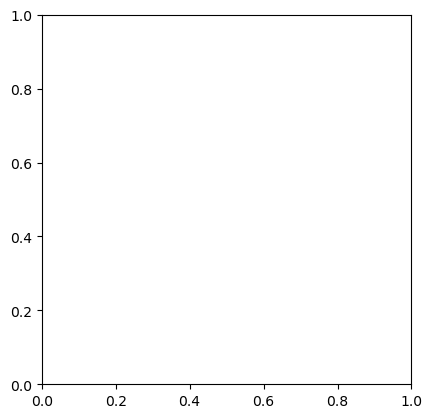

In [83]:
rle = [0,2,24,232,57,27,255,60,91,0,140,234,52,88,197,56,25,56,4,104,49,234,79,243,31,180,122,17,232,199,137,29,92,106,81,166,198,139,24,151,3,3,0,140,94,62,172,47,255,63,229,191,152,253,163,215,143,2,56,56,211,177,122,108,111,81,191,71,3,27,244,106,241,166,70,155,26,100,104,145,135,95,0,140,218,57,200,241,99,165,141,31,129,59,128,70,227,141,255,231,252,198,127,55,255,48,159,204,126,49,211,198,149,25,116,105,241,252,219,252,143,230,54,142,4,230,1,28,214,155,255,143,242,127,152,251,240,159,252,126,49,134,112,18,176,8,197,35,71,141,58,56,88,239,227,206,194,249,241,224,71,105,27,60,100,60,4,12,2,56,141,135,255,26,39,1,39,0,141,202,63,57,253,163,249,196,255,145,252,199,237,30,12,118,177,179,91,80,141,46,50,12,126,1,25,44,106,145,179,91,109,141,186,118,216,219,163,109,141,186,118,216,219,167,109,141,154,54,8,208,35,7,201,224,17,162,236,63,248,228,248,9,24,4,107,49,252,227,255,249,255,35,249,194,126,209,233,71,167,62,148,122,113,233,91,211,143,18,57,104,222,227,156,142,226,61,40,246,103,246,200,127,49,251,91,239,143,186,62,249,251,163,239,143,186,61,248,246,99,182,141,230,54,216,224,99,187,143,110,61,248,251,163,223,143,42,57,216,244,117,255,252,104,252,4,140,2,59,188,199,255,137,255,39,249,183,249,31,246,119,255,143,250,63,203,127,49,254,95,255,183,249,174,255,227,234,140,23,128,145,128,71,189,192,90,255,227,170,143,231,75,255,199,79,192,73,192,35,221,224,45,127,241,232,105,191,248,226,56,9,24,4,100,81,233,240,22,191,248,255,52,223,252,116,220,4,140,2,60,8,255,56,16,95,252,122,92,4,124,2,52,8,255,56,16,127,252,127,145,135,112,17,176,8,215,56,16,191,252,104,188,4,108,2,54,46,4,47,255,26,135,1,27,0,141,139,129,11,255,198,163,192,70,192,35,98,224,66,255,241,168,112,17,176,8,216,184,16,191,252,106,60,4,108,2,57,46,4,47,255,26,135,1,27,0,143,79,129,11,255,198,163,192,70,192,35,230,224,66,255,241,215,112,17,112,8,199,35,252,224,66,255,241,242,112,17,112,8,213,120,16,223,252,126,124,4,92,2,57,78,4,55,255,31,175,1,23,0,143,71,129,13,255,199,209,192,69,192,35,229,224,67,127,241,246,112,17,48,8,207,99,252,224,67,127,241,251,112,17,48,8,214,120,17,31,255,1,19,0,141,135,129,17,255,198,153,192,67,192,35,97,224,68,127,241,211,240,16,240,8,216,120,17,31,252,126,92,4,60,2,54,30,4,79,255,24,135,1,11,0,141,135,129,19,255,198,133,192,66,192,35,97,224,68,255,241,169,112,16,176,8,216,120,17,63,252,116,252,4,44,2,54,29,207,255,31,212,126,252,4,223,254,60,142,2,22,1,27,15,2,39,255,143,230,50,254,2,14,1,27,15,2,43,255,141,35,128,131,128,70,197,192,138,255,227,84,224,32,224,17,176,240,34,191,248,233,248,8,56,4,108,60,8,175,254,60,126,2,14,1,27,23,2,43,255,143,91,128,131,128,70,195,192,138,255,227,214,224,32,224,17,177,112,34,191,248,245,184,8,56,4,108,60,8,175,254,61,110,2,14,1,27,23,2,43,255,143,91,128,131,128,70,197,192,138,255,227,215,224,32,224,17,177,112,34,191,248,245,184,8,56,4,112,252,8,175,254,61,110,2,14,1,28,183,2,43,255,143,95,128,131,128,71,7,192,138,255,227,214,224,32,224,17,178,240,34,191,248,245,248,8,56,4,108,92,8,175,254,61,126,2,14,1,27,63,2,43,255,143,95,128,131,128,71,111,192,138,255,227,215,208,96,17,145,198,183,27,4,104,57,204,2,61,142,4,87,255,30,190,127,0,141,198,62,73,251,99,232,142,178,251,28,108,145,177,198,189,26,196,99,185,28,2,53,200,254,248,17,95,252,122,249,236,2,52,168,251,111,255,71,237,127,174,62,200,250,231,234,143,134,61,72,245,99,206,142,166,118,56,217,35,99,195,108,145,200,71,147,30,180,125,92,8,191,254,60,188,246,1,29,28,127,216,79,255,17,255,79,251,31,220,126,216,175,178,63,56,254,163,253,143,251,129,23,255,199,123,158,192,35,195,201,127,248,175,251,129,31,255,198,233,158,192,35,208,224,86,255,241,167,103,176,8,244,248,21,191,252,103,249,236,2,61,78,5,103,255,30,244,97,57,236,2,61,62,5,103,255,30,110,127,0,143,79,129,89,255,199,63,159,192,35,211,224,86,127,241,171,231,240,8,244,248,21,159,252,100,185,252,2,61,78,5,95,255,30,252,96,217,252,2,61,62,5,95,255,30,206,131,0,143,79,129,87,255,199,187,159,192,35,44,143,231,129,87,255,199,217,159,192,35,81,224,86,127,241,250,103,240,8,231,184,21,159,252,126,185,252,2,60,174,5,103,255,31,94,123,0,140,70,63,142,5,103,255,30,230,123,0,140,247,129,91,255,199,179,158,192,35,73,224,86,255,241,236,231,176,8,224,120,21,191,252,123,57,236,2,59,174,5,111,255,30,206,123,0,143,59,129,91,255,199,179,158,192,35,210,224,86,255,241,237,103,112,8,196,99,248,224,86,255,241,236,231,112,8,206,248,21,223,252,123,57,220,2,52,156,175,255,29,236,121,49,230,199,195,192,148,255,227,218,206,224,17,165,101,127,248,252,167,245,143,231,129,41,255,199,179,157,192,35,74,202,255,241,255,112,37,255,248,246,179,184,4,105,92,10,239,254,61,156,238,1,26,87,2,187,255,143,103,59,128,70,149,192,162,255,227,244,197,127,241,237,103,112,8,210,184,20,95,252,127,56,175,254,61,156,238,1,26,87,2,139,255,143,235,21,255,199,179,157,192,35,74,224,87,127,241,236,231,112,8,210,184,21,223,252,123,57,220,2,52,174,5,119,255,30,206,119,0,141,43,129,93,255,199,179,157,192,35,74,224,87,127,241,236,231,112,8,210,184,21,223,252,123,57,220,2,52,174,5,119,255,30,206,119,0,141,15,129,93,255,199,179,157,192,35,27,224,87,127,241,236,231,112,8,193,35,152,224,86,255,241,236,231,176,8,198,227,135,143,106,63,136,255,120,21,63,252,123,57,236,2,48,40,197,227,42,140,194,52,216,237,227,239,183,255,31,188,126,81,246,97,121,40,234,99,194,143,26,62,200,254,248,18,223,252,121,217,252,2,48,25,192,227,9,140,138,50,251,102,83,152,70,91,133,198,99,30,156,150,50,216,204,99,50,141,230,58,88,240,103,198,143,243,129,31,255,199,117,163,192,48,248,30,27,2,194,96,113,138,198,63,25,52,228,241,249,112,35,255,248,219,246,248,4,96,49,129,91,3,143,119,129,31,255,198,171,188,192,35,198,224,50,127,241,252,234,127,248,212,119,152,4,111,60,8,255,254,53,29,230,1,26,103,2,63,255,141,71,121,128,70,31,31,95,2,59,255,141,71,121,128,70,3,31,47,2,59,255,141,71,123,128,71,203,192,142,255,227,81,222,224,17,242,240,35,191,248,212,119,152,4,100,113,252,240,35,191,248,212,119,152,4,105,252,8,255,254,53,29,230,1,26,231,2,63,255,141,71,121,128,70,189,192,143,255,227,81,222,96,17,175,112,35,255,248,211,55,152,4,107,220,8,255,254,50,29,230,1,26,199,2,59,255,143,162,48,109,230,1,25,103,1,251,255,143,239,29,255,199,159,189,192,35,9,142,131,129,27,255,199,55,190,192,35,33,142,38,61,94,4,95,255,26,102,251,0,140,14,49,184,203,227,90,142,42,61,104,251,56,16,223,252,122,177,135,239,240,8,192,163,4,140,58,49,184,204,35,55,141,110,56,216,245,163,236,224,65,127,241,206,70,3,192,65,192,35,1,140,10,48,72,193,99,14,140,114,51,8,205,227,120,142,42,59,120,249,227,243,143,215,128,249,255,198,187,192,70,192,35,1,140,10,48,72,193,99,22,140,110,50,136,205,163,57,140,234,55,136,232,227,206,143,170,63,190,3,191,255,25,39,1,43,0,156,10,48,59,96,177,139,70,67,25,124,102,241,158,97,243,253,175,255,31,142,59,255,143,210,63,251,126,113,250,71,231,31,148,126,113,249,71,231,63,148,126,113,249,71,227,31,148,126,49,249,71,227,31,252,127,89,47,254,57,168,193,184,10,24,4,96,81,129,198,9,56,46,31,6,218,127,241,244,70,129,27,236,112,209,199,199,29,28,124,241,209,199,225,56,232,226,35,120,140,230,51,204,102,115,25,196,103,49,156,70,115,25,196,103,145,165,71,1,28,44,113,177,198,71,27,60,100,121,49,245,71,227,31,222,23,255,143,178,56,88,200,120,11,216,6,211,255,142,178,48,120,197,227,26,140,118,49,200,199,103,28,140,119,9,142,70,55,24,182,83,5,140,42,49,152,198,176,152,228,101,177,155,198,113,26,100,112,17,194,199,79,29,196,116,209,171,70,111,24,212,96,124,5,236,3,105,255,199,5,24,4,224,81,129,198,5,24,28,224,81,129,225,176,44,174,1,134,192,163,4,156,22,48,168,198,99,26,140,146,50,136,200,227,12,140,22,48,46,2,254,1,31,102,207,255,141,231,97,128,78,5,108,14,48,30,3,14,1,29,190,207,255,141,231,129,49,128,70,151,31,142,203,255,141,211,129,49,128,70,27,27,52,124,91,31,254,53,254,4,198,1,24,12,98,81,155,199,83,127,254,62,253,87,255,31,108,99,60,9,156,2,48,24,193,99,37,141,118,56,72,229,99,123,140,250,55,120,225,99,185,143,151,75,255,199,231,27,60,96,92,9,188,2,48,56,195,227,28,140,134,49,152,193,227,24,140,114,50,200,206,99,96,142,74,61,88,249,176,191,142,67,255,143,198,63,40,249,35,187,142,50,57,152,246,35,228,143,170,62,88,236,227,62,140,83,129,59,128,70,3,56,28,96,81,128,70,5,24,28,96,145,131,70,33,25,4,102,145,157,97,115,216,222,99,134,158,50,57,72,245,163,228,143,198,255,252,125,113,217,199,93,28,52,108,51,158,198,115,25,100,99,209,144,198,107,25,204,103,113,156,198,83,24,52,96,92,10,108,2,48,24,192,227,5,195,96,209,140,70,57,56,236,100,17,154,70,115,25,236,108,83,195,70,243,25,220,101,49,148,70,57,24,141,176,104,193,39,3,140,22,216,52,96,156,11,44,2,48,43,224,113,130,206,13,24,140,227,145,140,70,13,24,36,224,113,128,240,49,112,8,192,103,3,140,11,136,223,128]

img = decode_rle(rle,166,207)

# img = np.reshape(img, [166, 207, 4])[:,:,3]
# img[img>0] = 1
# img = np.reshape(img,[166, 207, 1])

print(img.shape)
plt.imshow(img, cmap='gray')